# Data Science Project 1: Free Throws

Questions from the project template:

What is the impact of home vs away on free throws?

* What is the impact of playoffs on free throws?
* What is the impact of how far into the game we are (in minutes) on free throws?
* Which players seem to be especially consistent in all situations? Meaning they always make/miss at about the same rate, regardless of any factors.
How important are free throws in terms of winning/losing the game?

My questions:

* Which shots were made during the playoffs and which were made during non-playoff games?
* What percentage of playoff free throws were made?
* What percentage of non-playoff free throws were made?
* Do these percentages differ between first, second, third shots?

* According to clock time, how does shot success change?

* What is the average rate of shot success for any particular player for the first, second, third shots?
* What is the average difference between the most successful shot category for a player and the least successful? Which players have the smallest difference?

* For a given team, what is the rate of won games?
* For a given team, what is the rate of free throws made in games that they won?
* For a given team, what is the rate of free throws made in games that they lost?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/drive/Shareddrives/MATH 2327 3439 - Data/data/free_throws.csv")

## Initial characterization of data
Shots made in playoffs:31,704

Shots made overall: 467,689

Total playoff shots: 42,000

This dataframe contains 618019 rows and 13 columns.

## Characterizing ranges of free throws made

LeBron James took over 8000 free throws. Dwayne Wade took 5594. Dwayne Wade took the fifth most free throws of anyone in our data set.

Overtime periods constitute less than 1% of the shots recorded.

In [3]:
df.groupby("season_start").nunique()

,period,player,playoffs,shot_made,home_team,visit_team,home_score,visit_score,home_final_score,visit_final_score,minutes,shot_count
season_start,,,,,,,,,,,,
2006,7,450,2,2,31,31,149,152,77,73,531,3
2007,6,443,2,2,31,31,148,144,73,74,530,3
2008,7,432,2,2,31,31,144,145,75,72,532,3
2009,7,436,2,2,31,31,149,141,73,70,531,3
2010,7,437,2,2,31,31,146,139,71,66,531,3
2011,8,466,2,2,31,31,145,140,65,69,530,3
2012,7,459,2,2,30,30,142,138,72,68,530,3
2013,7,463,2,2,30,30,140,139,68,72,531,3
2014,7,475,2,2,30,30,141,138,69,69,529,3


In [4]:
shotcount_df = df["player"].value_counts()

## Characterizing rates of free throw success per player

In [5]:
df.home_team.unique()

array(['LAL', 'MIA', 'BOS', 'CLE', 'DET', 'GS', 'MIN', 'NJ', 'ORL', 'PHI',
       'PHX', 'SEA', 'UTAH', 'MEM', 'CHA', 'DAL', 'LAC', 'ATL', 'CHI',
       'DEN', 'IND', 'SA', 'TOR', 'HOU', 'MIL', 'NY', 'POR', 'WSH', 'NO',
       'SAC', 'WEST', 'OKC', 'EAST', 'BKN'], dtype=object)

In [6]:
df.visit_team.unique()

array(['PHX', 'CHI', 'NO', 'WSH', 'MIL', 'LAL', 'SAC', 'TOR', 'ATL',
       'LAC', 'POR', 'HOU', 'NY', 'IND', 'SA', 'DEN', 'DET', 'MIN', 'SEA',
       'NJ', 'PHI', 'UTAH', 'CLE', 'CHA', 'MEM', 'DAL', 'GS', 'BOS',
       'ORL', 'MIA', 'EAST', 'OKC', 'WEST', 'BKN'], dtype=object)

<Axes: xlabel='period', ylabel='minutes'>

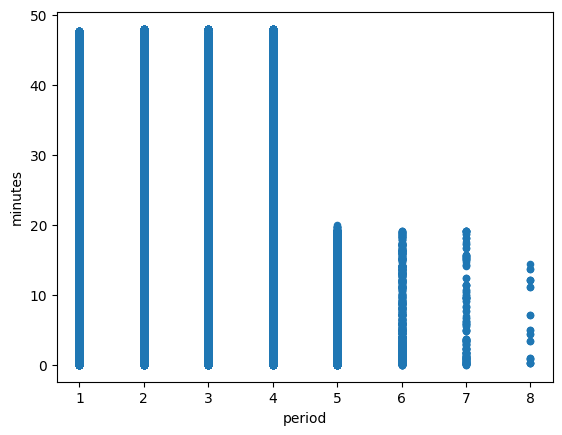

In [7]:
df.plot(kind="scatter", x="period", y="minutes")

(array([97424., 65413., 59070., 58058., 52260., 47002., 46971., 43601.,
        41867., 41006., 37584., 27763.]),
 array([ 0.,  4.,  8., 12., 16., 20., 24., 28., 32., 36., 40., 44., 48.]),
 <BarContainer object of 12 artists>)

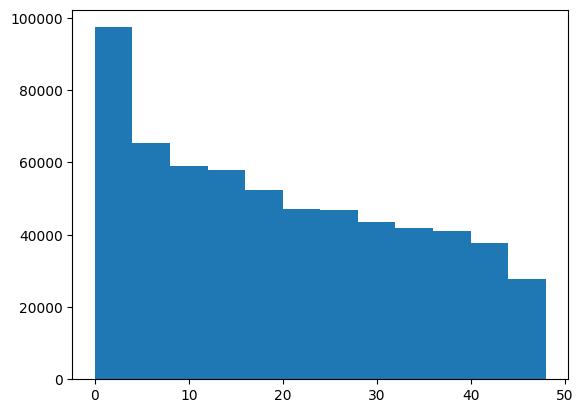

In [8]:
fig, ax = plt.subplots()

plt.hist(df["minutes"], bins=12)


In [9]:
grouped_df = df.groupby(pd.cut(df["minutes"], bins=[ 0.,  4.,  8., 12., 16., 20., 24., 28., 32., 36., 40., 44., 48.]))

In [10]:
player_grouped_time_df = df.groupby(by=["player", pd.cut(df["minutes"], bins=[ 0.,  4.,  8., 12., 16., 20., 24., 28., 32., 36., 40., 44., 48.])]).agg({"shot_made" : ["sum", "count"]})

In [11]:
player_grouped_time_df.reset_index(inplace=True)

In [12]:
player_grouped_time_df[("success_rate", "stderr")] = player_grouped_time_df[("shot_made", "sum")] / player_grouped_time_df[("shot_made", "count")]

In [13]:
player_stderr_df = player_grouped_time_df.groupby("player").agg({("success_rate", "stderr") : np.std}).sort_values(by=("success_rate", "stderr"), ascending=True)

In [14]:
player_stderr_nona_df = player_stderr_df.dropna()

In [15]:
player_stderr_nona_df.reset_index()

,player,success_rate
,,stderr
0,Edwin Ubiles,0.000000
1,Eric Piatkowski,0.000000
2,Derrick Byars,0.000000
3,Pat Connaughton,0.000000
4,Eddie Gill,0.000000
...,...,...
1053,James Augustine,0.515388
1054,Kris Joseph,0.520416
1055,Eric Moreland,0.707107


In [16]:
player_stderr_nona_df[player_stderr_nona_df[("success_rate","stderr")] > 0]

,success_rate
,stderr
player,
Dirk Nowitzki,0.014538
Chauncey Billups,0.015654
LeBron James,0.015854
Kevin Durant,0.016309
Kevin Martin,0.016855
...,...
James Augustine,0.515388
Kris Joseph,0.520416


In [17]:
df[df["player"] == "Kevin Martin"]

,period,player,playoffs,shot_made,home_team,visit_team,home_score,visit_score,home_final_score,visit_final_score,minutes,season_start,shot_count
375,2,Kevin Martin,0,1,MIN,SAC,35,33,92,83,16.200000,2006,1
378,2,Kevin Martin,0,0,MIN,SAC,35,34,92,83,14.533333,2006,1
379,2,Kevin Martin,0,1,MIN,SAC,35,35,92,83,14.533333,2006,2
380,3,Kevin Martin,0,1,MIN,SAC,45,46,92,83,39.200000,2006,1
385,3,Kevin Martin,0,0,MIN,SAC,64,65,92,83,1.666667,2006,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
613726,4,Kevin Martin,0,1,DAL,SA,88,91,91,96,1.200000,2015,1
613727,4,Kevin Martin,0,1,DAL,SA,88,92,91,96,1.200000,2015,2
617356,2,Kevin Martin,1,1,SA,MEM,39,24,94,68,20.200000,2015,1
617384,4,Kevin Martin,1,0,SA,MEM,82,63,94,68,21.333333,2015,1


(array([363., 276., 149.,  99.,  91.,  56.,  11.,  10.,   0.,   3.]),
 array([0.        , 0.07071068, 0.14142136, 0.21213203, 0.28284271,
        0.35355339, 0.42426407, 0.49497475, 0.56568542, 0.6363961 ,
        0.70710678]),
 <BarContainer object of 10 artists>)

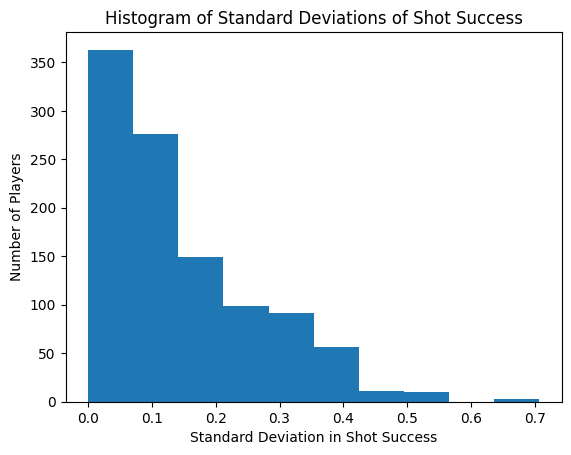

In [18]:
fig, ax = plt.subplots()
plt.title("Histogram of Standard Deviations of Shot Success")
plt.xlabel("Standard Deviation in Shot Success")
plt.ylabel("Number of Players")
plt.hist(player_stderr_df)

In [19]:
grouped_df.agg({"shot_made" : ["sum", "count"]})

shot_made       
                   sum  count
minutes                      
(0.0, 4.0]       74850  97176
(4.0, 8.0]       49214  65063
(8.0, 12.0]      44442  59075
(12.0, 16.0]     43087  56905
(16.0, 20.0]     39444  52142
(20.0, 24.0]     35580  46978
(24.0, 28.0]     35587  46979
(28.0, 32.0]     33369  44195
(32.0, 36.0]     31651  41825
(36.0, 40.0]     30847  40986
(40.0, 44.0]     27962  37471
(44.0, 48.0]     19610  26558

In [20]:
df.describe()

,period,playoffs,shot_made,home_score,visit_score,home_final_score,visit_final_score,minutes,season_start,shot_count
count,618019.000000,618019.000000,618019.000000,618019.000000,618019.000000,618019.000000,618019.000000,618019.000000,618019.000000,618019.000000
mean,2.696207,0.068163,0.756755,57.460855,55.483427,102.043044,98.986169,19.833309,2010.383351,1.450677
std,1.126026,0.252026,0.429042,30.208047,29.462562,12.288972,12.145901,13.830263,2.913279,0.512467
min,1.000000,0.000000,0.000000,0.000000,0.000000,59.000000,54.000000,0.000000,2006.000000,1.000000
25%,2.000000,0.000000,1.000000,33.000000,31.000000,94.000000,91.000000,7.400000,2008.000000,1.000000
50%,3.000000,0.000000,1.000000,58.000000,56.000000,102.000000,99.000000,18.066667,2010.000000,1.000000
75%,4.000000,0.000000,1.000000,82.000000,79.000000,110.000000,107.000000,31.333333,2013.000000,2.000000
max,8.000000,1.000000,1.000000,166.000000,161.000000,168.000000,161.000000,48.000000,2015.000000,3.000000


In [21]:
bins_to_avgs = pd.DataFrame((grouped_df["shot_made"].sum() / grouped_df["shot_made"].count()) * 100)

In [22]:
bins_to_avgs = bins_to_avgs.reset_index()

## Calculating effect of minutes remaining on shot success

about 75% of free throws were made overall

In [ ]:
player_shots_avg_df = df.groupby("player")["shot_made"].mean()

In [ ]:
player_shots_avg_df.describe()
player_shots_avg_df

player
A.J. Price            0.748227
Aaron Brooks          0.836790
Aaron Gordon          0.681102
Aaron Gray            0.557522
Aaron Harrison        0.416667
                        ...   
Zach LaVine           0.815789
Zach Randolph         0.765154
Zaza Pachulia         0.752208
Zoran Dragic          0.600000
Zydrunas Ilgauskas    0.789357
Name: shot_made, Length: 1098, dtype: float64

(array([ 5.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,
         0.,  1.,  2.,  5.,  3.,  6.,  1., 10.,  5.,  7.,  9.,  6., 41.,
        14., 22., 23., 23., 39., 34., 36., 58., 53., 74., 72., 98., 87.,
        71., 91., 57., 48., 38., 15., 12.,  2.,  1.,  1., 26.]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
        0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
 <BarContainer object of 50 artists>)

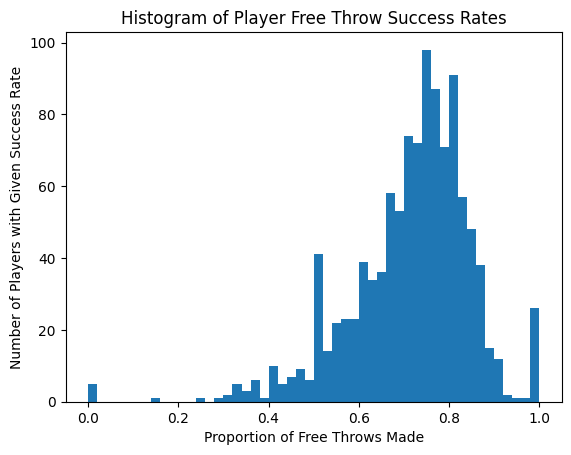

In [ ]:
fig, ax = plt.subplots()
plt.title("Histogram of Player Free Throw Success Rates")
plt.xlabel("Proportion of Free Throws Made")
plt.ylabel("Number of Players with Given Success Rate")
plt.hist(player_shots_avg_df, bins=50)

In [ ]:
home_wins_df = df[df["home_final_score"] > df["visit_final_score"]]

In [ ]:
team_shotpct_df = home_wins_df.groupby("home_team").agg({"shot_made" : ["sum", "count"]})

In [ ]:
team_shotpct_df.columns

MultiIndex([('shot_made',   'sum'),
            ('shot_made', 'count')],
           )

In [ ]:
team_shotpct_df["percent"] = team_shotpct_df[('shot_made', "sum")] / team_shotpct_df[("shot_made", "count")]

In [ ]:
team_shotpct_df.sort_values(by="percent", ascending=False)

shot_made          percent
                sum  count          
home_team                           
DAL           11212  14400  0.778611
OKC           10164  13059  0.778314
SEA            1241   1599  0.776110
POR            9825  12738  0.771314
TOR            9019  11762  0.766791
SAC            7039   9215  0.763863
ATL            9924  12999  0.763443
MIN            5556   7279  0.763292
WSH            7442   9752  0.763126
NO             8095  10630  0.761524
MEM            9117  11975  0.761336
GS            11163  14671  0.760889
IND           10152  13351  0.760392
PHX            9356  12319  0.759477
MIL            7531   9920  0.759173
BOS           10875  14347  0.757998
NY             7191   9488  0.757905
CHI           10248  13530  0.757428
NJ             4127   5454  0.756692
SA            11917  15805  0.754002
PHI            6206   8236  0.753521
UTAH          11371  15100  0.753046
LAL           10348  13744  0.752910
MIA           11126  14802  0.751655
CHA            7777  10358  0.750821
DEN           11851  15816  0.749305
CLE           10043  13478  0.745140
DET            8128  10955  0.741944
HOU           10370  13987  0.741403
BKN            3107   4217  0.736780
ORL            8887  12113  0.733675
LAC            9786  13424  0.728993
WEST             83    116  0.715517